<a href="https://colab.research.google.com/github/aashikagarg/Airline-crew-scheduling-mini-project4/blob/main/algo_efficiency_mini_project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import**

In [9]:
# Install required packages
!pip install memory_profiler matplotlib
import matplotlib.pyplot as plt
import time
import random


**Inputs**


In [10]:
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 13),
    ('F5', 15, 17)
]

crew_members = ["C1", "C2", "C3"]
MIN_REST = 1

print("Flights:", flights)
print("Crew Members:", crew_members)


Flights: [('F1', 9, 11), ('F2', 10, 12), ('F3', 13, 15), ('F4', 11, 13), ('F5', 15, 17)]
Crew Members: ['C1', 'C2', 'C3']


**Constraint Checker**

In [11]:
def is_valid_assignment(assigned_flights, new_flight):
    fid_new, start_new, end_new = new_flight

    for fid, start, end in assigned_flights:
        if not (end_new + MIN_REST <= start or end + MIN_REST <= start_new):
            return False
    return True

print("✔ Constraint function loaded successfully")


✔ Constraint function loaded successfully


**Backtracking Function**

In [12]:
def solve_schedule():
    solution = {c: [] for c in crew_members}
    best = None
    calls = 0

    def backtrack(i):
        nonlocal best, calls
        calls += 1

        if i == len(flights):
            best = {c: solution[c][:] for c in solution}
            return True

        flight = flights[i]

        for crew in crew_members:
            if is_valid_assignment(solution[crew], flight):
                solution[crew].append(flight)
                if backtrack(i + 1):
                    return True
                solution[crew].pop()
        return False

    start = time.time()
    backtrack(0)
    end = time.time()

    return best, calls, end - start

print("✔ Backtracking function ready")


✔ Backtracking function ready


**Run Backtracking + Print Output**

In [13]:
best_solution, recursive_calls, exec_time = solve_schedule()

print("\n===== FINAL ASSIGNMENT =====")
for c in best_solution:
    print(f"{c}: {best_solution[c]}")

print("\n🔁 Recursive Calls:", recursive_calls)
print("⏳ Time Taken:", exec_time, "seconds")



===== FINAL ASSIGNMENT =====
C1: [('F1', 9, 11), ('F3', 13, 15)]
C2: [('F2', 10, 12), ('F5', 15, 17)]
C3: [('F4', 11, 13)]

🔁 Recursive Calls: 6
⏳ Time Taken: 1.4543533325195312e-05 seconds


**GANTT Chart**

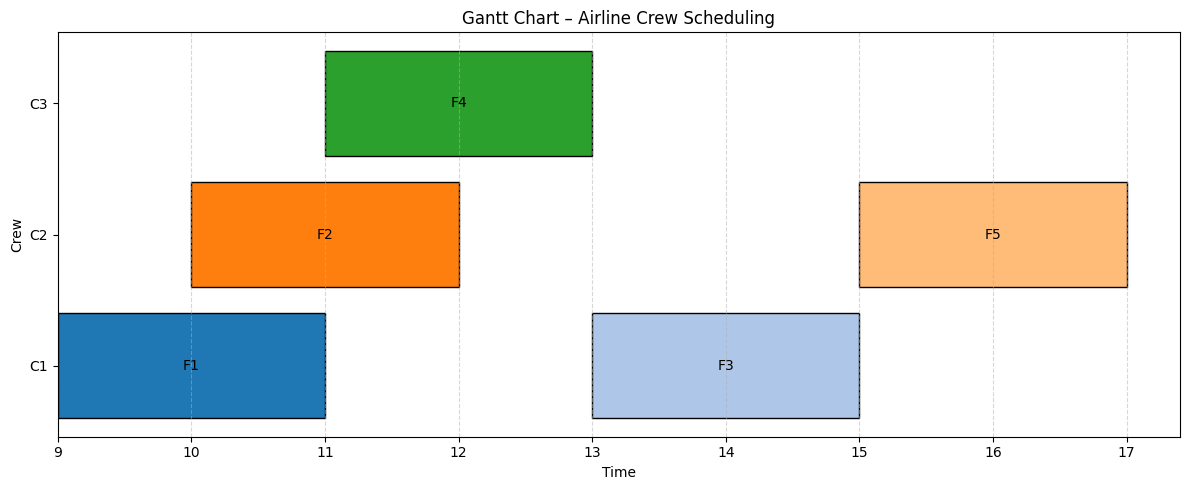

In [14]:
def plot_gantt(assignments):
    plt.figure(figsize=(12,5))
    ax = plt.gca()

    colors = {}
    color_index = 0

    for crew in assignments:
        for f in assignments[crew]:
            fid, s, e = f
            if fid not in colors:
                colors[fid] = plt.cm.tab20(color_index)
                color_index += 1

    for crew in assignments:
        for fid, start, end in assignments[crew]:
            ax.barh(crew, end-start, left=start,
                    color=colors[fid], edgecolor="black")
            ax.text((start+end)/2, crew, fid,
                    ha='center', va='center', fontsize=10)

    plt.xlabel("Time")
    plt.ylabel("Crew")
    plt.title("Gantt Chart – Airline Crew Scheduling")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_gantt(best_solution)


**Graph: Execution Time vs Number of Flights**

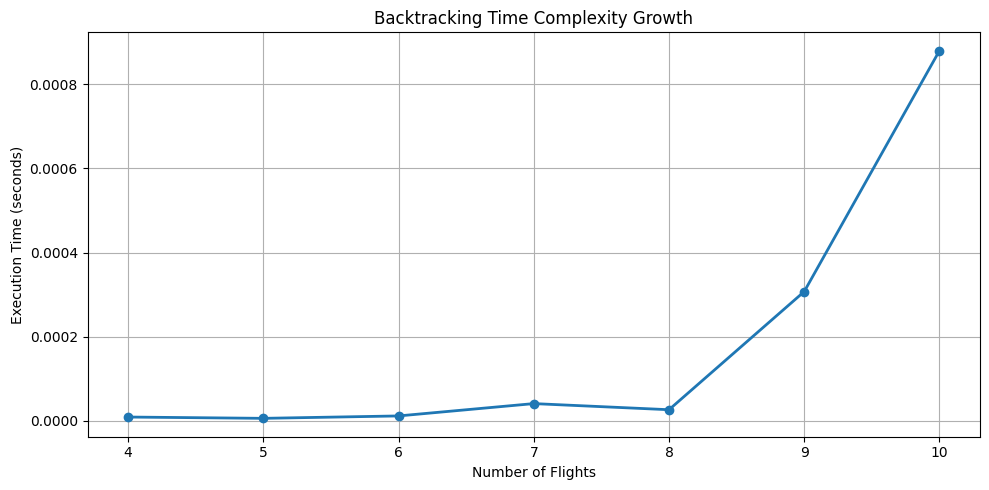

In [15]:
def generate_flights(n):
    fl = []
    for i in range(n):
        s = random.randint(8, 14)
        e = s + random.randint(1, 3)
        fl.append((f"F{i+1}", s, e))
    return fl

sizes = list(range(4, 11))
times = []

for n in sizes:
    global flights
    flights = generate_flights(n)
    _, _, t = solve_schedule()
    times.append(t)

# Reset to original flights
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 13),
    ('F5', 15, 17)
]

plt.figure(figsize=(10,5))
plt.plot(sizes, times, marker='o', linewidth=2)
plt.title("Backtracking Time Complexity Growth")
plt.xlabel("Number of Flights")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()


**Final Summary**

In [16]:
print("============================")
print("📌 FINAL SUMMARY – REPORT")
print("============================")
print("Problem: Airline Crew Scheduling")
print("Method: Backtracking (Constraint Satisfaction)")
print("Time Complexity: O(k × 2ⁿ)")
print("Recursive Calls:", recursive_calls)
print("Minimum Rest Time:", MIN_REST, "hour")
print("Graphs generated: Gantt Chart + Time Complexity Curve")
print("============================")


📌 FINAL SUMMARY – REPORT
Problem: Airline Crew Scheduling
Method: Backtracking (Constraint Satisfaction)
Time Complexity: O(k × 2ⁿ)
Recursive Calls: 6
Minimum Rest Time: 1 hour
Graphs generated: Gantt Chart + Time Complexity Curve
